In [11]:
import warnings
warnings.filterwarnings(action='ignore')

from glob import glob

from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [12]:
def load_data(file, sheet_name):
    return pd.read_excel(file, sheet_name=sheet_name)

In [13]:
def load_all_data():
    files = glob('/Users/sabin/Documents/Project/뉴스와 소셜데이터 기반 이슈 분석 및 시각화/Trend-analysis/dataset/임대차3법(54,752건)/*.xlsx')
    df = pd.DataFrame()
    for file in files:
        df = df.append(load_data(file, '블로그'))
    return df

twitter = load_all_data()

## 트위터 Sheet

In [14]:
twitter.isna().sum()

Unnamed: 0      0
Unnamed: 1      0
Unnamed: 2     33
Unnamed: 3    142
dtype: int64

In [15]:
twitter.columns = twitter.iloc[0]
twitter.drop(0, inplace=True, axis=0)
twitter = twitter[twitter['내용'].str.len() < 1000]

print(twitter.shape)
twitter.head()

(3026, 4)


,작성일,작성자,제목,내용
20,2020/07/28,hosabi55,"'임대차3법'에 ‘전월세대란’, ‘세입자불안’ 걱정하는듯 언론도 아무말대잔치","<0728 중도정론 표방 한국 기사 비교> \n'임대차3법'에 ‘전월세대란’, ‘세..."
36,2020/07/30,leetaegu18,임대차3법 시행시기 최종개정안,임대차3법 시행시기 최종개정안 \n목차 \n1. 임대차3법 주요 내용 \n2. 전...
46,2020/10/14,gg-bar,'민관협력 경기도 임대차3법 상담센터 설치' 업무협약을 체결 (20.09.22.),경기중앙지방변호사회는 정부의 임대차3법 시행에 따른 주택시장의 혼란을 최소화하기 위...
68,2020/07/26,namchuldo,[타박이] 임대차3법 계약갱신청구 거절 가능 사유에 집주인의 실거주 포함 예정,7/26/2020 처음 7/26/2020 \n \n7월26일 발표된 국토교통부의 ...
69,2020/07/26,namchuldo,[타박이] 임대차3법 소급적용 가능성 높다 - 7월26일 국토교통부 보도설명자료,7/26/2020 처음 7/26/2020 \n \n일요일임에도 발표된 국토교통부의 ...


## TF-IDF

In [16]:
def tfdif(corpus):
    cv = CountVectorizer(ngram_range=(1, 2), max_features=1000)
    document_term_matrix = cv.fit_transform(corpus)

    tf = pd.DataFrame(document_term_matrix.toarray(), columns=cv.get_feature_names())  # TF (Term Frequency)

    D = len(tf)
    df = tf.astype(bool).sum(axis=0)
    idf = np.log((D+1) / (df+1)) + 1             # IDF (Inverse Document Frequency)

    # TF-IDF (Term Frequency-Inverse Document Frequency)
    tfidf = tf * idf                      
    tfidf = tfidf / np.linalg.norm(tfidf, axis=1, keepdims=True)
    
    return tfidf


In [17]:
tfidf_twitter = tfdif(twitter['내용'])

In [18]:
tfidf_twitter

,000,01,010,03,04,05,07,09,10,100,...,현재,현행,혜택,혜택을,혹은,혼란을,홍남기,확대,확인,확정일자
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.081621,0.0,0.0,0.0,0.0,0.121741,0.0,0.223841,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.090453,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.088318,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3021,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0
3022,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.106293,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0
3023,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0
3024,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0


In [19]:
# import pickle

# tfidf_twitter.to_pickle('./tfidf_df/tfidf_twitter.pkl')

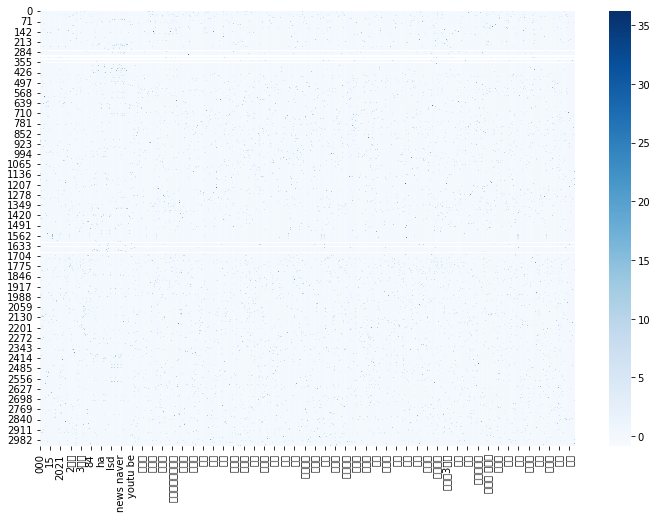

In [20]:
tfidf_twitter = (tfidf_twitter - tfidf_twitter.mean()) / tfidf_twitter.std()

# visualize

plt.figure(figsize=(12, 8))
sns.heatmap(tfidf_twitter, cmap='Blues')
plt.show()


# TFDIF

We couldn't figure the relationship between the words linearly

as we can see in the graph above